# Requirements

In [24]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import pandas as pd
import matplotlib.pyplot as plt
import os

# Configuration

In [2]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
os.environ['MallocStackLogging'] = '0'

# Simple Usage

In [3]:
# Initialize the webdriver.
browser = webdriver.Chrome(options=options)

In [17]:
# Navigate to a web page.
browser.get('https://finance.yahoo.com/crypto')

In [6]:
# Print the page source code.
print(browser.page_source)

<html><head></head><body></body></html>


# Laboratory Exercise - Run Mode (8 points)

In this laboratory assignment, the goal is to perform web scraping using **Selenium** on the website https://finance.yahoo.com/crypto. The task includes the extraction of **Cryptocurrency names** and their **price** and **market cap**. Following this data extraction, you will construct a data frame to organize the collected data. Finally, you are expected to generate a histogram to provide a visual representation of the distribution of the prices.

## Hints
- To navigate to a specific page with a given URL, use the `browser.get(url)` method.
- When selecting a single element, use `browser.find_element`, and for multiple elements, use `browser.find_elements`. Both of these functions take two arguments. The first specifies the attribute used to locate the element on the web page, and the second specifies the value of that attribute.
- The `By` class is used to specify which attribute is used to locate elements on a page. These are the various ways the attributes are used to locate elements on a page: `By.ID`, `By.NAME`, `By.TAG_NAME`, `BY.CLASS_NAME`, `By.CSS_SELECTOR`, etc.
- For more details, check the documentation (https://selenium-python.readthedocs.io/locating-elements.html).

## Solution

In [19]:
# Write your code her
crypto_names = browser.find_elements(By.CSS_SELECTOR, 'td:nth-child(1) a')
prices = browser.find_elements(By.CSS_SELECTOR, 'td:nth-child(4)')
market_caps = browser.find_elements(By.CSS_SELECTOR, 'td:nth-child(7)')

# Store the extracted data in lists
names = [name.text for name in crypto_names]
caps = [cap.text for cap in market_caps]
price_values = [price.text for price in prices]

In [20]:
names

['BTC-USD',
 'ETH-USD',
 'USDT-USD',
 'BNB-USD',
 'SOL-USD',
 'USDC-USD',
 'XRP-USD',
 'STETH-USD',
 'DOGE-USD',
 'WTRX-USD',
 'TRX-USD',
 'TON11419-USD',
 'ADA-USD',
 'WSTETH-USD',
 'SHIB-USD',
 'WBTC-USD',
 'AVAX-USD',
 'WETH-USD',
 'LINK-USD',
 'BCH-USD',
 'DOT-USD',
 'SUI20947-USD',
 'LEO-USD',
 'U\nUSDS33039-USD',
 'DAI-USD']

In [21]:
caps

['1.381T',
 '303.093B',
 '120.537B',
 '83.036B',
 '78.457B',
 '34.765B',
 '29.37B',
 '24.527B',
 '23.68B',
 '14.593B',
 '14.457B',
 '12.563B',
 '12.462B',
 '11.153B',
 '10.378B',
 '10.257B',
 '10.17B',
 '8.493B',
 '7.143B',
 '6.937B',
 '5.953B',
 '5.71B',
 '5.602B',
 '5.55B',
 '5.365B']

In [22]:
price_values

['69,845.16',
 '2,517.19',
 '0.999706',
 '576.24',
 '166.63',
 '0.999919',
 '0.516452',
 '2,514.60',
 '0.161512',
 '0.166926',
 '0.167212',
 '4.9382',
 '0.356110',
 '2,977.07',
 '0.000018',
 '69,776.10',
 '24.98',
 '2,516.33',
 '11.39',
 '350.66',
 '3.9341',
 '2.0063',
 '6.0556',
 '0.997115',
 '0.999879']

In [25]:
crypto = [] 

for i in range(len(crypto_names)):
    dict = {
        "Crypto Name" : crypto_names[i].get_attribute("title"),
        "Crypto Price" : prices[i].text.replace(',',''),
        "Market Cap" : market_caps[i].text
    }
    
    crypto.append(dict)

crypto

[{'Crypto Name': 'Bitcoin USD',
  'Crypto Price': '69525.38',
  'Market Cap': '1.375T'},
 {'Crypto Name': 'Ethereum USD',
  'Crypto Price': '2514.09',
  'Market Cap': '302.720B'},
 {'Crypto Name': 'Tether USDt USD',
  'Crypto Price': '0.999706',
  'Market Cap': '120.537B'},
 {'Crypto Name': 'BNB USD', 'Crypto Price': '576.24', 'Market Cap': '83.036B'},
 {'Crypto Name': 'Solana USD',
  'Crypto Price': '166.63',
  'Market Cap': '78.457B'},
 {'Crypto Name': 'USD Coin USD',
  'Crypto Price': '0.999919',
  'Market Cap': '34.765B'},
 {'Crypto Name': 'XRP USD',
  'Crypto Price': '0.516452',
  'Market Cap': '29.37B'},
 {'Crypto Name': 'Lido Staked ETH USD',
  'Crypto Price': '2514.60',
  'Market Cap': '24.527B'},
 {'Crypto Name': 'Dogecoin USD',
  'Crypto Price': '0.161512',
  'Market Cap': '23.68B'},
 {'Crypto Name': 'Wrapped TRON USD',
  'Crypto Price': '0.166926',
  'Market Cap': '14.593B'},
 {'Crypto Name': 'TRON USD',
  'Crypto Price': '0.167212',
  'Market Cap': '14.457B'},
 {'Crypto Nam

In [26]:
df = pd.DataFrame(crypto)

In [27]:
df

,Crypto Name,Crypto Price,Market Cap
0,Bitcoin USD,69525.38,1.375T
1,Ethereum USD,2514.09,302.720B
2,Tether USDt USD,0.999706,120.537B
3,BNB USD,576.24,83.036B
4,Solana USD,166.63,78.457B
5,USD Coin USD,0.999919,34.765B
6,XRP USD,0.516452,29.37B
7,Lido Staked ETH USD,2514.60,24.527B
8,Dogecoin USD,0.161512,23.68B
9,Wrapped TRON USD,0.166926,14.593B


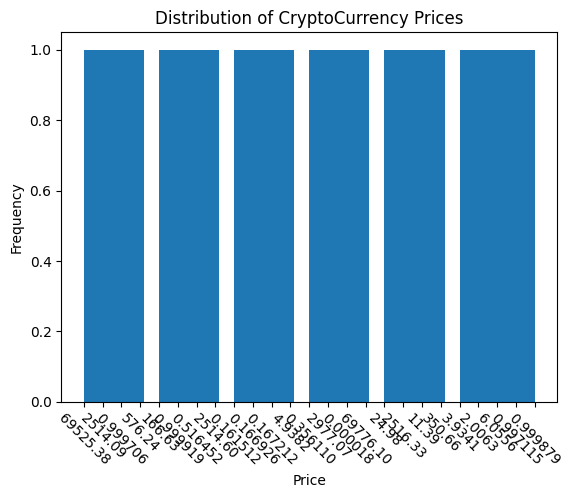

In [30]:
plt.hist(df['Crypto Price'], bins=30)
plt.title("Distribution of CryptoCurrency Prices")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks(rotation=315)
browser.quit()

In [29]:
crypto = df.to_csv('crypto.csv')

# Laboratory Exercise - Bonus Task (+ 2 points)

The additional task involves clicking on the symbol for BTC-USD and on the new page that appears click on the **Historical data**. You will extract the prices and market caps for the BTC-USD only, and make line plot for the price data.

## Hints
- To populate an input field (`input_field`) with some `text` use `input_field.send_keys(text)`.
- To click on a specific `element` on a web page use `element.click()`.

In [4]:
driver = webdriver.Chrome(options=options)

In [13]:
driver.get("https://finance.yahoo.com/quote/BTC-USD/")

In [14]:
# Click on the Historical data tab
historical_data = driver.find_element(By.LINK_TEXT, 'Historical Data')
historical_data.click()

In [15]:
historical_data_price = driver.find_elements(By.CSS_SELECTOR, "td:nth-child(5)")
historical_data_date = driver.find_elements(By.CSS_SELECTOR, "td:nth-child(1)")
historical_data_market_cap = driver.find_elements(By.CSS_SELECTOR, "td:nth-child(7)")

data_prices = [price.text for price in historical_data_price]
date_values = [date.text for date in historical_data_date]
data_market_cap = [cape.text for cape in historical_data_market_cap]

In [16]:
data_prices

['69,351.36',
 '70,215.19',
 '72,339.54',
 '72,720.49',
 '69,907.76',
 '67,929.30',
 '67,014.70',
 '66,642.41',
 '68,161.05',
 '66,432.20',
 '67,361.41',
 '67,367.85',
 '69,001.70',
 '68,362.73',
 '68,418.79',
 '67,399.84',
 '67,612.72',
 '67,041.11',
 '66,046.13',
 '62,851.38',
 '63,193.02',
 '62,445.09',
 '60,274.50',
 '60,582.10',
 '62,131.97',
 '62,236.66',
 '62,818.95',
 '62,089.95',
 '62,067.48',
 '60,759.40',
 '60,632.79',
 '60,837.01',
 '63,329.50',
 '65,635.30',
 '65,887.65',
 '65,790.66',
 '65,181.02',
 '63,143.14',
 '64,301.97',
 '63,329.80',
 '63,648.71',
 '63,394.84',
 '63,192.98',
 '62,940.46',
 '61,649.68',
 '60,308.54',
 '58,192.51',
 '59,182.84',
 '60,005.12',
 '60,571.30',
 '58,127.01',
 '57,343.17',
 '57,648.71',
 '57,019.54',
 '54,841.57',
 '54,139.69',
 '53,948.75',
 '56,160.49',
 '57,971.54',
 '57,431.02',
 '59,112.48',
 '57,325.49',
 '58,969.90',
 '59,119.48',
 '59,388.18',
 '59,027.63',
 '59,504.13',
 '62,880.66',
 '64,333.54',
 '64,178.99',
 '64,094.36',
 '60,3

In [17]:
date_values

['Nov 1, 2024',
 'Oct 31, 2024',
 'Oct 30, 2024',
 'Oct 29, 2024',
 'Oct 28, 2024',
 'Oct 27, 2024',
 'Oct 26, 2024',
 'Oct 25, 2024',
 'Oct 24, 2024',
 'Oct 23, 2024',
 'Oct 22, 2024',
 'Oct 21, 2024',
 'Oct 20, 2024',
 'Oct 19, 2024',
 'Oct 18, 2024',
 'Oct 17, 2024',
 'Oct 16, 2024',
 'Oct 15, 2024',
 'Oct 14, 2024',
 'Oct 13, 2024',
 'Oct 12, 2024',
 'Oct 11, 2024',
 'Oct 10, 2024',
 'Oct 9, 2024',
 'Oct 8, 2024',
 'Oct 7, 2024',
 'Oct 6, 2024',
 'Oct 5, 2024',
 'Oct 4, 2024',
 'Oct 3, 2024',
 'Oct 2, 2024',
 'Oct 1, 2024',
 'Sep 30, 2024',
 'Sep 29, 2024',
 'Sep 28, 2024',
 'Sep 27, 2024',
 'Sep 26, 2024',
 'Sep 25, 2024',
 'Sep 24, 2024',
 'Sep 23, 2024',
 'Sep 22, 2024',
 'Sep 21, 2024',
 'Sep 20, 2024',
 'Sep 19, 2024',
 'Sep 18, 2024',
 'Sep 17, 2024',
 'Sep 16, 2024',
 'Sep 15, 2024',
 'Sep 14, 2024',
 'Sep 13, 2024',
 'Sep 12, 2024',
 'Sep 11, 2024',
 'Sep 10, 2024',
 'Sep 9, 2024',
 'Sep 8, 2024',
 'Sep 7, 2024',
 'Sep 6, 2024',
 'Sep 5, 2024',
 'Sep 4, 2024',
 'Sep 3, 2024

In [18]:
data_market_cap

['50,285,789,184',
 '40,627,912,076',
 '40,646,637,831',
 '58,541,874,402',
 '38,799,856,657',
 '16,721,307,878',
 '19,588,098,156',
 '41,469,984,306',
 '31,414,428,647',
 '32,263,980,353',
 '31,808,472,566',
 '37,498,611,780',
 '18,975,847,518',
 '14,443,497,908',
 '36,857,165,014',
 '32,790,898,511',
 '38,195,189,534',
 '48,863,870,879',
 '43,706,958,056',
 '18,177,529,690',
 '16,744,110,886',
 '30,327,141,594',
 '30,452,813,570',
 '27,670,982,363',
 '28,134,475,157',
 '34,253,562,610',
 '14,776,233,667',
 '13,305,410,749',
 '29,585,472,513',
 '36,106,447,279',
 '40,762,722,398',
 '50,220,923,500',
 '37,112,957,475',
 '14,788,214,575',
 '15,243,637,984',
 '32,058,813,449',
 '36,873,129,847',
 '25,078,377,700',
 '29,938,335,243',
 '31,400,285,425',
 '20,183,348,802',
 '14,408,616,220',
 '35,177,164,222',
 '42,710,252,573',
 '40,990,702,891',
 '38,075,570,118',
 '32,032,822,113',
 '18,120,960,867',
 '16,428,405,496',
 '32,490,528,356',
 '33,835,707,949',
 '37,049,062,672',
 '28,857,630

In [21]:
hist_data = [] 

for i in range(len(historical_data_price)):
    
    dict = {
        "Date for BTC/USD" : historical_data_date[i].text,
        "Historical data for BTC/USD - Price" : historical_data_price[i].text.replace(',',''), 
        "Historical data for BTC/USD - Market Cap" : historical_data_market_cap[i].text.replace(',','')
    }
    
    hist_data.append(dict)

hist_data

[{'Date for BTC/USD': 'Nov 1, 2024',
  'Historical data for BTC/USD - Price': '69351.36',
  'Historical data for BTC/USD - Market Cap': '50285789184'},
 {'Date for BTC/USD': 'Oct 31, 2024',
  'Historical data for BTC/USD - Price': '70215.19',
  'Historical data for BTC/USD - Market Cap': '40627912076'},
 {'Date for BTC/USD': 'Oct 30, 2024',
  'Historical data for BTC/USD - Price': '72339.54',
  'Historical data for BTC/USD - Market Cap': '40646637831'},
 {'Date for BTC/USD': 'Oct 29, 2024',
  'Historical data for BTC/USD - Price': '72720.49',
  'Historical data for BTC/USD - Market Cap': '58541874402'},
 {'Date for BTC/USD': 'Oct 28, 2024',
  'Historical data for BTC/USD - Price': '69907.76',
  'Historical data for BTC/USD - Market Cap': '38799856657'},
 {'Date for BTC/USD': 'Oct 27, 2024',
  'Historical data for BTC/USD - Price': '67929.30',
  'Historical data for BTC/USD - Market Cap': '16721307878'},
 {'Date for BTC/USD': 'Oct 26, 2024',
  'Historical data for BTC/USD - Price': '670

In [22]:
df = pd.DataFrame(hist_data)

In [23]:
df

,Date for BTC/USD,Historical data for BTC/USD - Price,Historical data for BTC/USD - Market Cap
0,"Nov 1, 2024",69351.36,50285789184
1,"Oct 31, 2024",70215.19,40627912076
2,"Oct 30, 2024",72339.54,40646637831
3,"Oct 29, 2024",72720.49,58541874402
4,"Oct 28, 2024",69907.76,38799856657
...,...,...,...
362,"Nov 5, 2023",35049.36,12412743996
363,"Nov 4, 2023",35082.20,9561294264
364,"Nov 3, 2023",34732.32,17158456701
365,"Nov 2, 2023",34938.24,20998158544


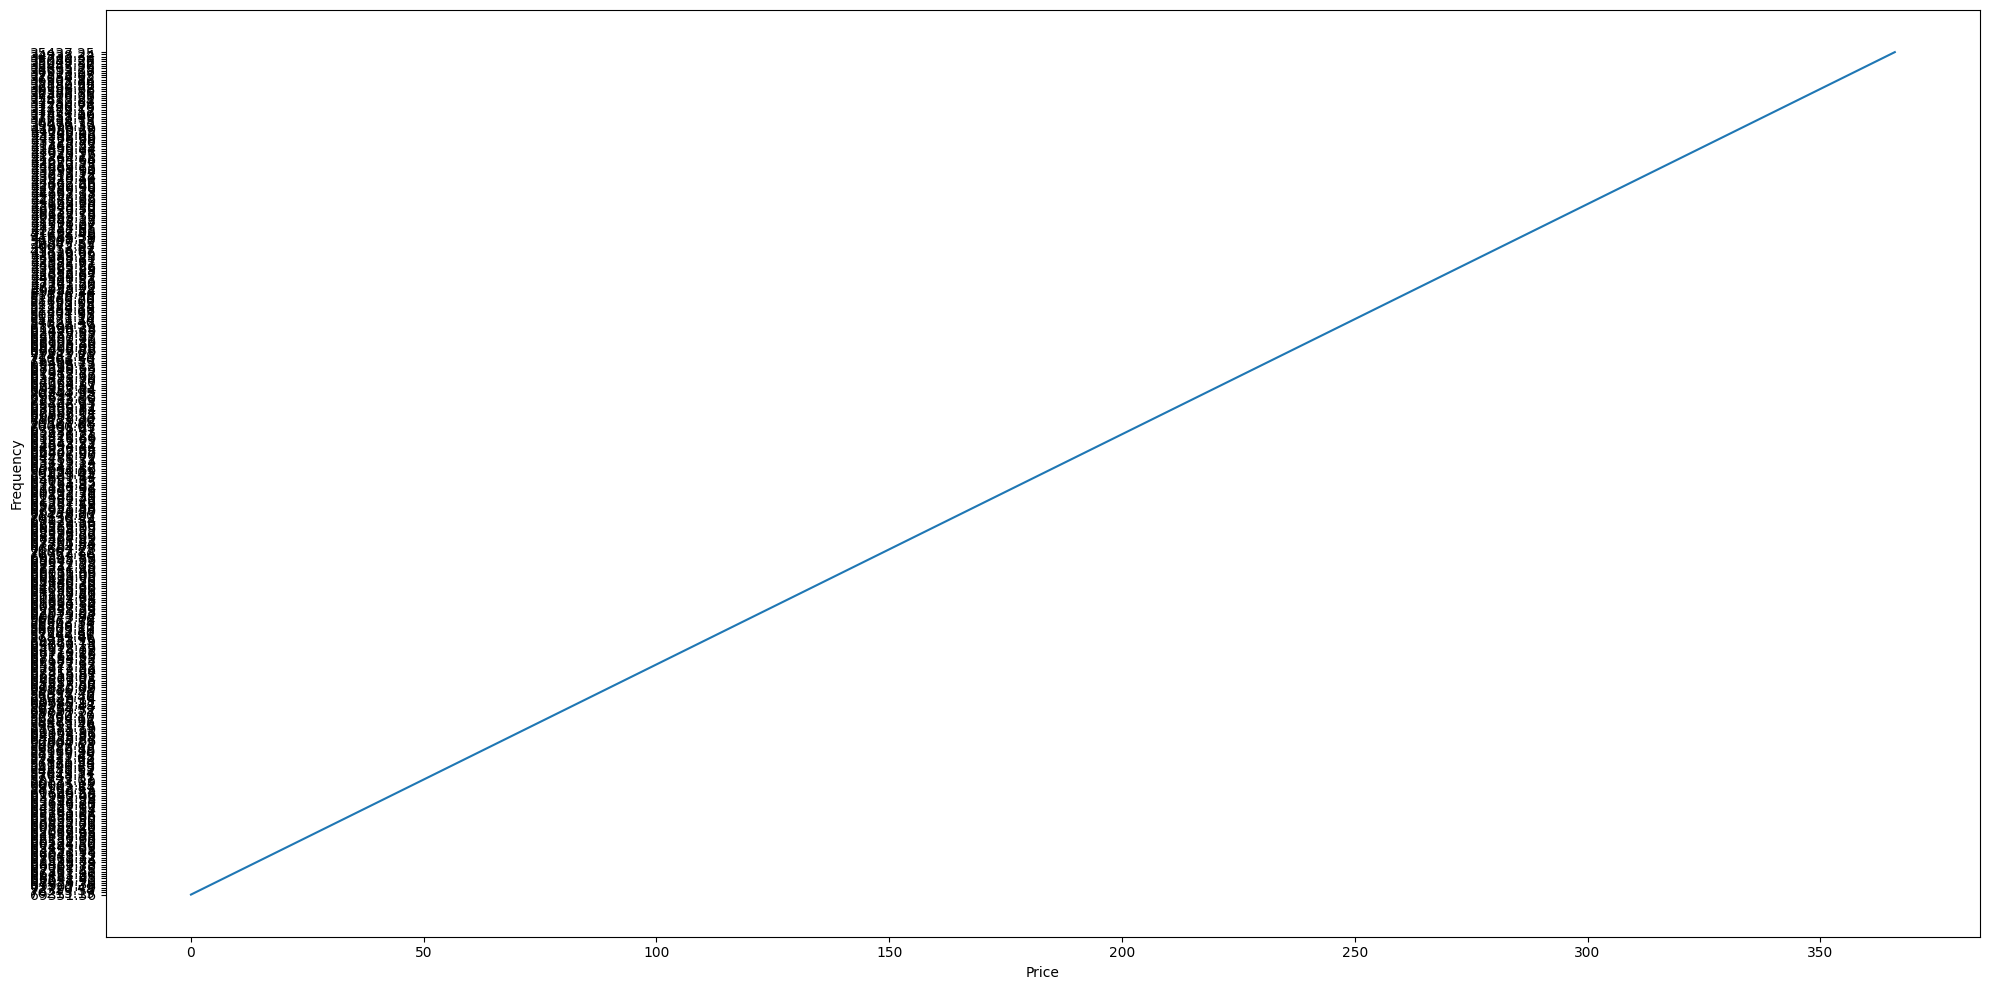

In [32]:
plt.figure(figsize=(20,10))
plt.plot(df['Historical data for BTC/USD - Price'])
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
driver.quit()

In [33]:
historical_data_btc = df.to_csv('historical_data_btc.csv')